In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=3691


In [2]:
H = create_hamiltonian(system), 0.1

In [3]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

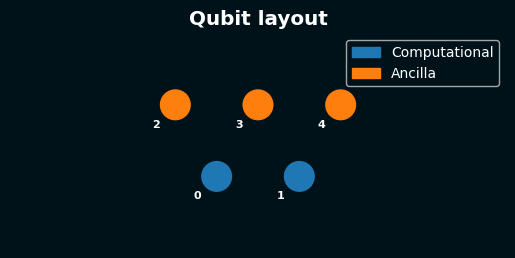

In [4]:
qubits.show_layout()

In [5]:
theta_opt = np.load("losses_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=200, n_grad=10, theta_init=theta_opt)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=66586


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        171.56547164916992 
        Armijo calculation time: 
        15.153911352157593 
        Total grad descend time: 
        3:6.72


In [7]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [8]:
theta_opt

array([-0.25779997,  0.05960309,  0.1       ,  0.1       ,  0.1       ,
        0.07841404,  0.13139363,  0.10366272,  0.32737946,  0.106416  ,
       -0.30791397, -0.04972606,  0.09982623,  0.10069004,  0.10080925,
       -0.13631114,  0.10625712,  0.07895507,  0.10055921,  0.10197677,
        0.10026075,  0.04548124,  0.25016824,  0.09438886,  0.17322425,
        0.09758529,  0.12796942,  0.28386218,  0.10059412,  0.10370709,
        0.09624148,  0.03693856,  0.08248176, -0.10337235,  0.0887531 ,
        0.07328499,  0.10087137,  0.04855613, -0.49921619,  0.08554793,
        0.10434137,  0.10035908, -0.05770033, -0.07118017,  0.10407487,
        0.10484116,  0.09700017,  0.10843809, -0.0545545 , -0.10395946,
        0.10226584,  0.10523424,  0.10186211,  0.11116461,  0.15436077,
        0.08572878,  0.64454349,  0.13945092,  0.14429962,  0.04373897,
        0.09832759,  0.09771271,  0.1018299 ,  0.33605736,  0.13347965,
       -0.22687994,  0.10034125,  0.12414765,  0.10194814,  0.09

rho_rand_haar: seed=67134


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

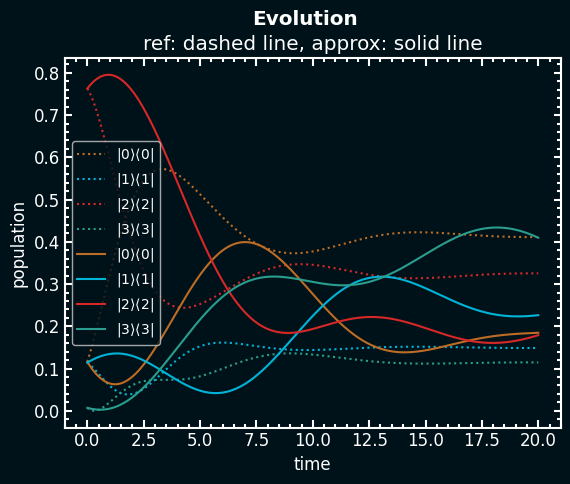

In [9]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(200, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.1, N=200, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

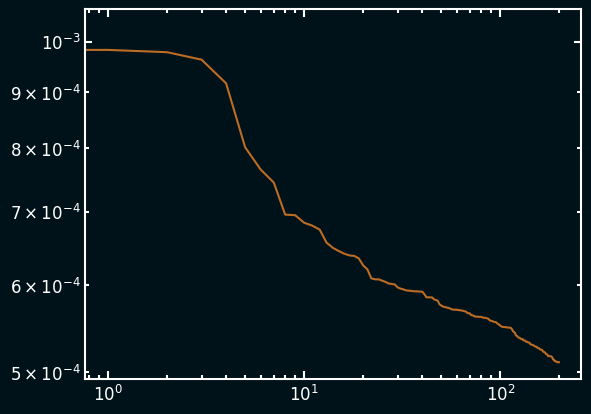

In [10]:
plt.loglog(errors)